In [ ]:
!pip install tensorflow==2.12.0
!pip install gradio

In [ ]:
# Import libraries
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


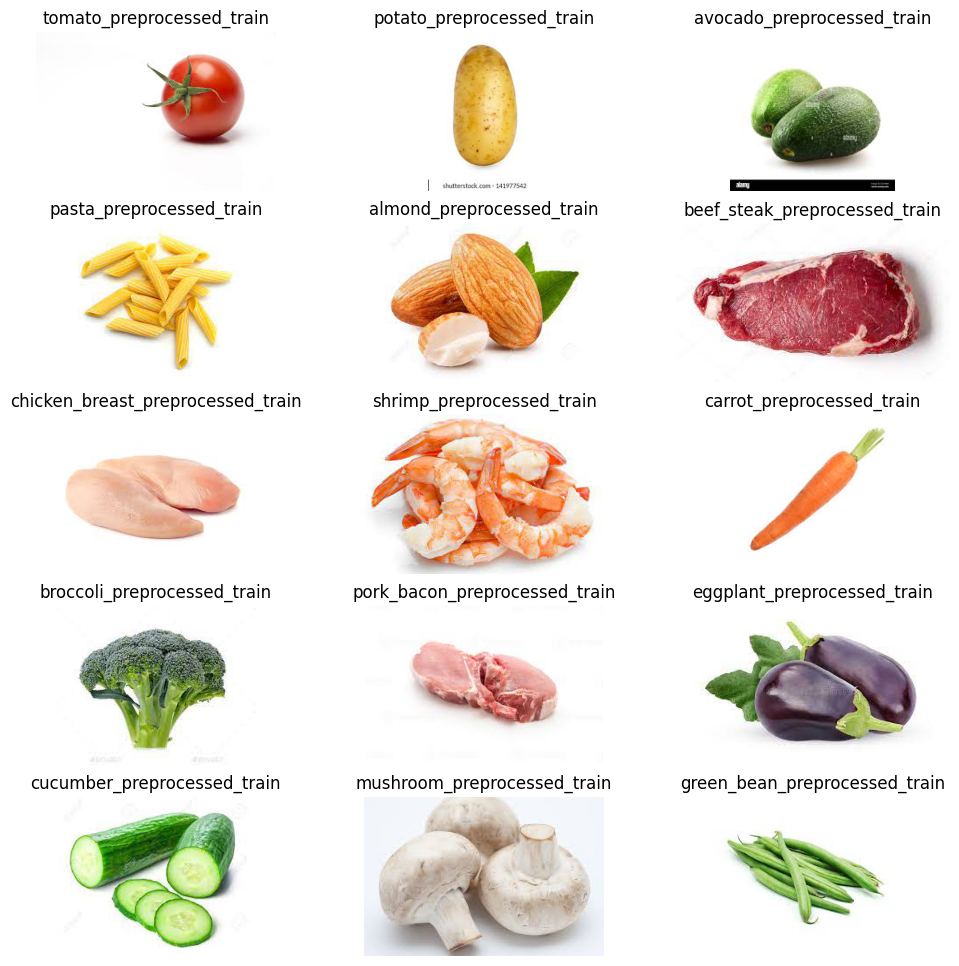

In [ ]:
train_path = "/content/drive/MyDrive/Big/img_preprocessed/preprocessed_train"
validation_path = "/content/drive/MyDrive/Big/img_preprocessed/preprocessed_validation"
test_path = "/content/drive/MyDrive/Big/img_preprocessed/preprocessed_test"

image_categories = os.listdir('/content/drive/MyDrive/Big/img_preprocessed/preprocessed_train')

def plot_images(image_categories):

    # Create a figure
    plt.figure(figsize=(12, 12))
    for i, cat in enumerate(image_categories):

        # Load images for the ith category
        image_path = train_path + '/' + cat
        images_in_folder = os.listdir(image_path)
        first_image_of_folder = images_in_folder[0]
        first_image_path = image_path + '/' + first_image_of_folder
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img)/255.0


        # Create Subplot and plot the images
        plt.subplot(5, 3, i+1)
        plt.imshow(img_arr)
        plt.title(cat)
        plt.axis('off')

    plt.show()

# Call the function
plot_images(image_categories)

In [ ]:
# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            validation_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 8784 images belonging to 15 classes.
Found 2250 images belonging to 15 classes.
Found 2244 images belonging to 15 classes.


In [ ]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

{0: 'almond_preprocessed_train', 1: 'avocado_preprocessed_train', 2: 'beef_steak_preprocessed_train', 3: 'broccoli_preprocessed_train', 4: 'carrot_preprocessed_train', 5: 'chicken_breast_preprocessed_train', 6: 'cucumber_preprocessed_train', 7: 'eggplant_preprocessed_train', 8: 'green_bean_preprocessed_train', 9: 'mushroom_preprocessed_train', 10: 'pasta_preprocessed_train', 11: 'pork_bacon_preprocessed_train', 12: 'potato_preprocessed_train', 13: 'shrimp_preprocessed_train', 14: 'tomato_preprocessed_train'}


In [ ]:
# Build a custom sequential CNN model

model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(15, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 87616)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [ ]:
# Compile and fit the model
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=10,
                 verbose=1,
                 validation_data=val_image_generator,
                #  steps_per_epoch = 8784//15,
                #  validation_steps = 2250//15,
                 callbacks=early_stopping)

Epoch 1/10
275/275 [==============================] - 464s 2s/step - loss: 0.2488 - accuracy: 0.9153 - val_loss: 0.2619 - val_accuracy: 0.9231
Epoch 2/10
275/275 [==============================] - 464s 2s/step - loss: 0.1637 - accuracy: 0.9469 - val_loss: 0.3279 - val_accuracy: 0.8978
Epoch 3/10
275/275 [==============================] - 480s 2s/step - loss: 0.1379 - accuracy: 0.9554 - val_loss: 0.2559 - val_accuracy: 0.9333
Epoch 4/10
275/275 [==============================] - 477s 2s/step - loss: 0.1027 - accuracy: 0.9694 - val_loss: 0.2312 - val_accuracy: 0.9391
Epoch 5/10
275/275 [==============================] - 441s 2s/step - loss: 0.0728 - accuracy: 0.9759 - val_loss: 0.1513 - val_accuracy: 0.9622
Epoch 6/10
275/275 [==============================] - 450s 2s/step - loss: 0.0850 - accuracy: 0.9751 - val_loss: 0.2324 - val_accuracy: 0.9364
Epoch 7/10
275/275 [==============================] - 446s 2s/step - loss: 0.0639 - accuracy: 0.9804 - val_loss: 0.3442 - val_accuracy: 0.9231

In [ ]:
model.evaluate(test_image_generator)

71/71 [==============================] - 471s 7s/step - loss: 0.7754 - accuracy: 0.7268


[0.7753909230232239, 0.726827085018158]

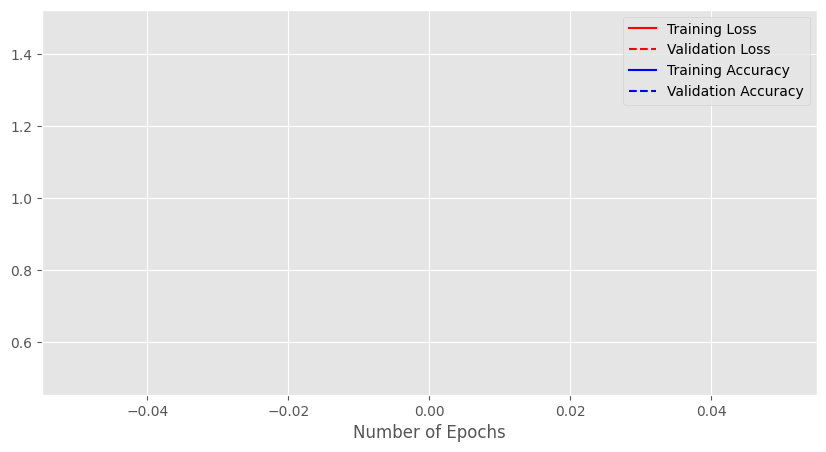

In [ ]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

1/1 [==============================] - 0s 95ms/step


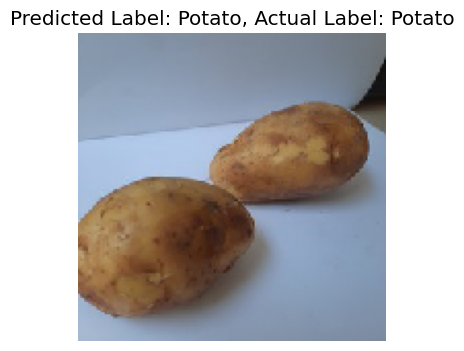

In [ ]:
# Testing the Model
test_image_path = '/content/drive/MyDrive/Big/Sample/Test/Potato/1005.jpg'

def generate_predictions(test_image_path, actual_label, bool=0):

    # 1. Load and preprocess the image
    test_img = image.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = image.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1], test_img_arr.shape[2]))

    # 2. Make Predictions
    predicted_label = np.argmax(model.predict(test_img_input))
    predicted_vegetable = class_map[predicted_label]
    if bool == 0:
      plt.figure(figsize=(4, 4))
      plt.imshow(test_img_arr)
      plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
      plt.grid()
      plt.axis('off')
      plt.show()

    if bool == 1:
      return predicted_vegetable

# call the function
generate_predictions(test_image_path, actual_label='Potato')